# introductory text (explain: dataset, task)

what dataset are you working with?  what are you trying to do? .. 
https://www.kaggle.com/datasets/brsdincer/star-type-classification
Example of a HertzSprung Russel Diagram: https://www.eso.org/public/images/eso0728c/

I gathered a relatively small dataset from Kaggle that originates from Nasa observations. Im setting out to use this data on the qualities of stars and their types to build a machine-learning algorithm to determine a star's type purely from factors such as radius, luminosity, absolute magnitude, color, Spectral Class, and temperature. While this task may seem trivial there are a lot of outliers and there is not any sort of concrete method to determine a star's type. When astronomers want to categorize a group of stars they have to do it by hand and have to look at previously classified stars to place them in a type. This is where I feel machine learning can fill a void and stop the slowdown astronomers face. For now ill be training only a few hundred stars but in the future, it can expand to incorporate hundreds of years of data.

# import requisite modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
#new libraries 
from sklearn.neural_network import MLPClassifier
from IPython.display import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# helper functions (if necessary)

In [2]:
# python code

# pre-process, analyze dataset

In [3]:
df = pd.read_csv('stars.csv')
print(df)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


# visualize dataset

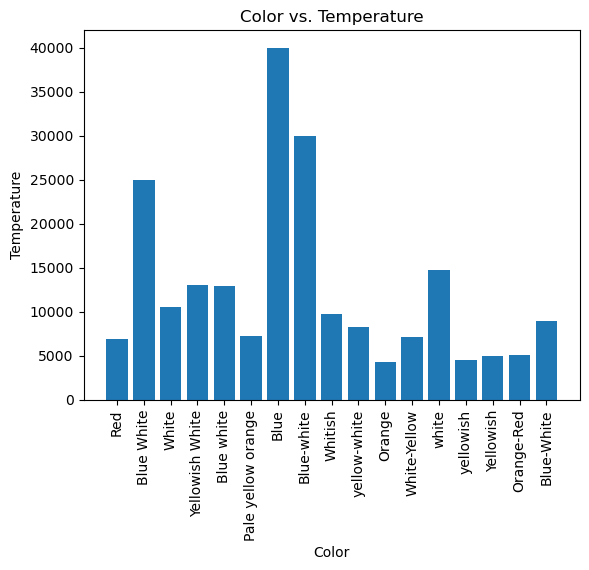

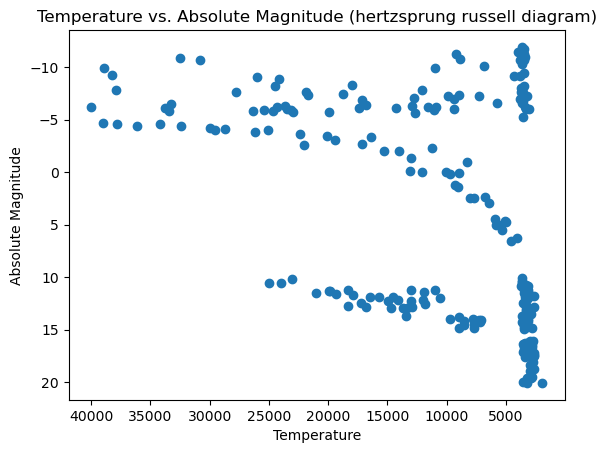

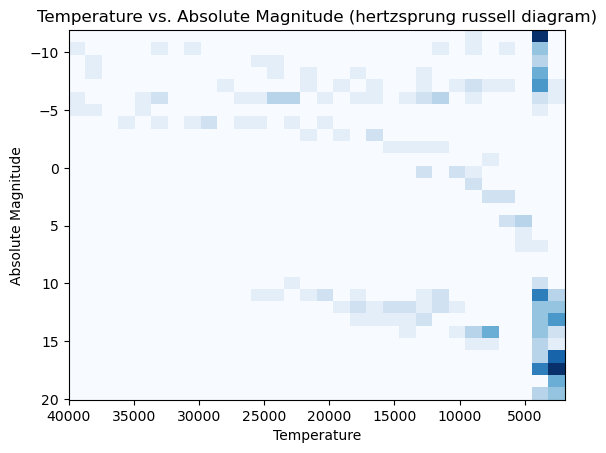

Correlation coefficient between Radius and Luminosity: 0.5265157243480015
Correlation coefficient between Temperature and Luminosity: 0.39340407550976114


In [4]:
# Bar Graph comparing color to Tempature
plt.bar(df['Color'], df['Temperature'])
plt.xlabel('Color')
plt.ylabel('Temperature')
plt.title('Color vs. Temperature')
plt.xticks(rotation=90)
plt.show()


#hertzsprung russell diagram
plt.scatter(df['Temperature'], df['A_M'])
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title('Temperature vs. Absolute Magnitude (hertzsprung russell diagram)')
plt.gca().invert_yaxis()  # invert the y-axis
plt.gca().invert_xaxis() 
plt.show()

x_bins = 30
y_bins = 30

#hertzsprung russell 2D histogram plot
plt.hist2d(df['Temperature'], df['A_M'], bins=[x_bins, y_bins], cmap='Blues')
plt.xlabel('Temperature')
plt.ylabel('Absolute Magnitude')
plt.title('Temperature vs. Absolute Magnitude (hertzsprung russell diagram)')

plt.gca().invert_yaxis()  
plt.gca().invert_xaxis()

plt.show()



corr_coef = df['R'].corr(df['L'])
print("Correlation coefficient between Radius and Luminosity:", corr_coef)


corr_coef = df['Temperature'].corr(df['L'])
print("Correlation coefficient between Temperature and Luminosity:", corr_coef)



# experiment with algorithms, feature sets, parameters, etc.,

In [5]:
label_encoder = LabelEncoder()
df['Color'] = label_encoder.fit_transform(df['Color'])
df['Spectral_Class'] = label_encoder.fit_transform(df['Spectral_Class'])
X = df.drop(['Type'], axis=1)
y = df['Type']

scaler = StandardScaler()
X = scaler.fit_transform(X)
# Pre-Prossecing happens here since the string vaulues need to be converted 
# and it would be great t0 represent them as numbers on a plot




dtc = DecisionTreeClassifier(random_state=42)
DTCy_pred = cross_val_predict(dtc, X, y, cv=5)
print('Decision Tree Classifier accuracy:', accuracy_score(y, DTCy_pred))
print('Decision Tree Classifier precision:', precision_score(y, DTCy_pred, average='weighted'))
print("\n")


rfc = RandomForestClassifier(random_state=42)
RFCy_pred = cross_val_predict(rfc, X, y, cv=5)
print('Random Forest Classifier accuracy:', accuracy_score(y, RFCy_pred))
print('Random Forest Classifier precision:', precision_score(y, RFCy_pred, average='weighted'))
print("\n")


mlp = MLPClassifier(random_state=42)
MLPy_pred = cross_val_predict(mlp, X, y, cv=5)
print('Multi-Layer Perceptron Classifier maximum iterations 200 accuracy:', accuracy_score(y, MLPy_pred))
print('Multi-Layer Perceptron Classifier maximum iterations 200 precision:', precision_score(y, MLPy_pred, average='weighted'))
print("\n")


mlp = MLPClassifier(random_state=42)
mlp = MLPClassifier(max_iter=1000)
mlp = MLPClassifier(learning_rate_init=0.13)
MLPy_pred2 = cross_val_predict(mlp, X, y, cv=5)
print('Multi-Layer Perceptron Classifier maximum iterations 1000 accuracy:', accuracy_score(y, MLPy_pred2))
print('Multi-Layer Perceptron Classifier maximum iterations 1000 precision:', precision_score(y, MLPy_pred2, average='weighted'))
print("\n")

mlp = MLPClassifier(random_state=42)
mlp = MLPClassifier(max_iter=1000)
mlp = MLPClassifier(learning_rate_init=0.13)
MLPy_pred3 = cross_val_predict(mlp, X, y, cv=5)
print('Multi-Layer Perceptron Classifier maximum iterations 1000 + 0.13 Learning rate accuracy:', accuracy_score(y, MLPy_pred3))
print('Multi-Layer Perceptron Classifier maximum iterations 1000 + 0.13 Learning rate precision:', precision_score(y, MLPy_pred3, average='weighted'))
print("\n")

Decision Tree Classifier accuracy: 0.9958333333333333
Decision Tree Classifier precision: 0.9959349593495935


Random Forest Classifier accuracy: 0.9916666666666667
Random Forest Classifier precision: 0.9917682926829269




C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\carte\anaconda3\lib\site-packages\sklearn\neural_network\_multi

Multi-Layer Perceptron Classifier maximum iterations 200 accuracy: 0.9458333333333333
Multi-Layer Perceptron Classifier maximum iterations 200 precision: 0.9460984169081162


Multi-Layer Perceptron Classifier maximum iterations 1000 accuracy: 0.9875
Multi-Layer Perceptron Classifier maximum iterations 1000 precision: 0.9878048780487805


Multi-Layer Perceptron Classifier maximum iterations 1000 + 0.13 Learning rate accuracy: 0.9833333333333333
Multi-Layer Perceptron Classifier maximum iterations 1000 + 0.13 Learning rate precision: 0.983328121742756




# visualize experimental results

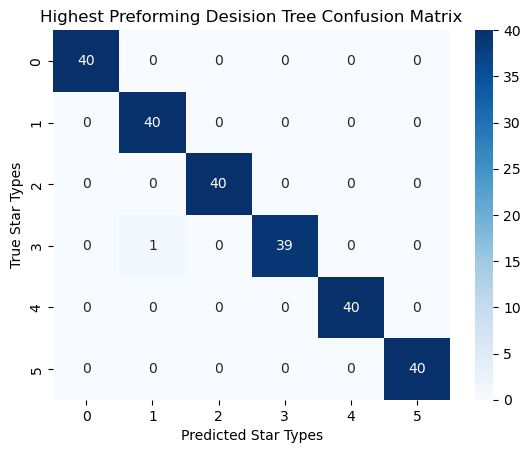

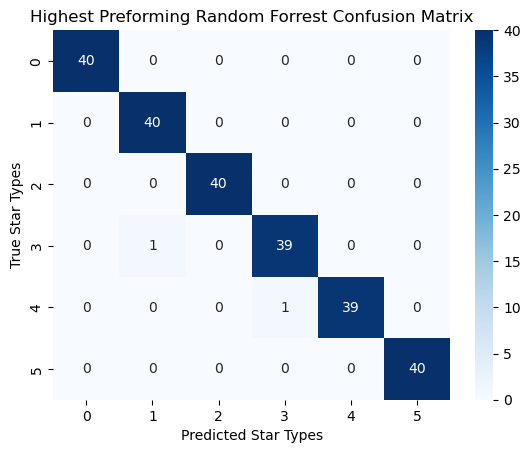

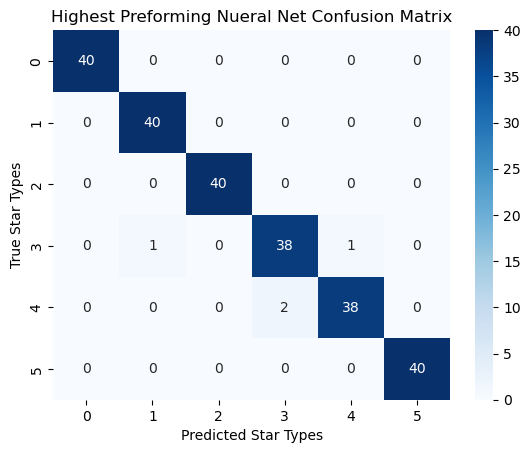

In [6]:
cm = confusion_matrix(y, DTCy_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Star Types')
plt.ylabel('True Star Types')
plt.title('Highest Preforming Desision Tree Confusion Matrix')
plt.show()


cm = confusion_matrix(y, RFCy_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Star Types')
plt.ylabel('True Star Types')
plt.title('Highest Preforming Random Forrest Confusion Matrix')
plt.show()

cm = confusion_matrix(y, MLPy_pred3)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Star Types')
plt.ylabel('True Star Types')
plt.title('Highest Preforming Nueral Net Confusion Matrix')
plt.show()





# analyze / explain experimental results

Models used 
-Decision Tree Classifier modifiers: Random seed, cross validation
-Random Forest Classifier modifiers: Random seed, cross validation
-MLPClassifier/Neural Network modifiers: Random seed, cross validation, Max Iterations, Training Rate

After Multiple rounds of cross-validation tweaking and seed changes along with even changing limiters for the neural network. The Decision tree classifier rains as the champion gets a staggering 99.5% accuracy and 99.4% precision. However, the other two were not far behind with a maxim of 3% apart. 

# conclusion 

I'm happy to say that my ideas were correct and that I was able to achieve my goal of creating a highly accurate model that could potentially save astronomers hundreds to thousands of hours. the decision tree turning out to be the best was not much of a surprise since a star's type is highly based on its parameters but what's important is these decisions that the model is making are replicating the decisions made by astronomers. Now Im excited since through all my research on star types I've learned about the grey areas of the Hertzsprung Russel Diagram where astronomers have to manually interpret the types of stars and now I found a nearly perfect way to classify them. I can only imagine how powerful and accurate a model trained on a massive database would be. If I were to take this project any further I would want to get the full database of classified stars to train a new model and see because I believe that if astronomers use this they would be about t opus the field of astronomy forward and make new discoveries and possible find stars that deserve their now new types.